## Image Preprocessing in Tensorflow

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

import tensorflow_datasets as tfds

Let's download 'Horses-or-Humans' dataset, and play with it.

In [49]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /content/horse-or-human.zip
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /content/validation-horse-or-human.zip
!mkdir /content/'horse-or-human'
!unzip /content/horse-or-human.zip -d /content/horse-or-human
!mkdir /content/validation-horse-or-human
!unzip /content/validation-horse-or-human.zip -d /content/validation-horse-or-human
print('All files downloaded and unzipped successfully.')

All files downloaded and unzipped successfully.


In [0]:
#getting reference to directory locations
train_horse_dir = os.path.join('/content/horse-or-human/horses/')
train_human_dir = os.path.join('/content/horse-or-human/humans/')
validation_horse_dir = os.path.join('/content/validation-horse-or-human/horses/')
validation_human_dir = os.path.join('/content/validation-horse-or-human/humans/')

In [54]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


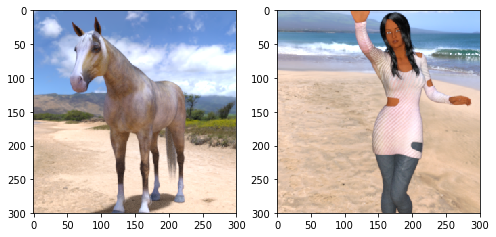

In [87]:
#Let's show some images
import matplotlib.image as mpimg

fig = plt.figure()
fig.set_figwidth(8)
fig.set_figheight(8)

horse_img_path = os.path.join(train_horse_dir, os.listdir(train_horse_dir)[0])
horse_img = mpimg.imread(horse_img_path)

human_img_path = os.path.join(train_human_dir, os.listdir(train_human_dir)[6])
human_img = mpimg.imread(human_img_path)

plt.subplot(121)
plt.imshow(horse_img)
plt.subplot(122)
plt.imshow(human_img)

### Loading the images with ImageDataGenerator

In [97]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#All images will be rescaled
train_datagen = ImageDataGenerator(rescale=1/255)
val_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory('/content/horse-or-human/',   #source directory of training images
                                     target_size = (300, 300),    #resizing the images
                                     batch_size = 128,            #setting batch sizes to 128
                                     class_mode = 'binary')       #binary classification

val_generator = val_datagen.flow_from_directory('/content/validation-horse-or-human/', #source directory of validation images
                                     target_size = (300, 300),
                                     batch_size = 32, 
                                     class_mode = 'binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


There are a lot many [other preprocessing techniques](https://keras.io/preprocessing/image/), that can be done with ImageDataGenerator, apart from rescaling it, which I have used above.

### Build the model

In [0]:
def create_model():
    model = tf.keras.models.Sequential([
        #The first convolution
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3),),
        tf.keras.layers.MaxPooling2D(2, 2),
        # The second convolution
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        # The third convolution
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        # The fourth convolution
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        # The fifth convolution
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        # Flatten the results to feed into a DNN
        tf.keras.layers.Flatten(),
        # 512 neuron hidden layer
        tf.keras.layers.Dense(512, activation='relu'),
        # Only 1 output neuron.
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer= tf.keras.optimizers.RMSprop(0.001), metrics=['accuracy'], 
                  loss='binary_crossentropy')
    
    return model

In [103]:
model = create_model()

#since we are passing input from a generator
model.fit_generator(
        train_generator, 
        steps_per_epoch = 8,   #total number of batches to be ouput by generator before an epoch is said to finish
                               #In this case, 8*batch_size = 8 * 128 = 1024 (which is equal to number of training examples)
        epochs = 12, 
        verbose = 2, 
        validation_data = val_generator,
        validation_steps = 8)

Epoch 1/12
8/8 - 9s - loss: 1.0170 - acc: 0.6574 - val_loss: 0.9638 - val_acc: 0.5000
Epoch 2/12
8/8 - 8s - loss: 0.5432 - acc: 0.7497 - val_loss: 1.6617 - val_acc: 0.5781
Epoch 3/12
8/8 - 8s - loss: 0.3947 - acc: 0.8330 - val_loss: 2.4933 - val_acc: 0.5742
Epoch 4/12
8/8 - 7s - loss: 0.4354 - acc: 0.8142 - val_loss: 0.4898 - val_acc: 0.8320
Epoch 5/12
8/8 - 8s - loss: 0.1764 - acc: 0.9244 - val_loss: 1.2390 - val_acc: 0.7852
Epoch 6/12
8/8 - 7s - loss: 0.0592 - acc: 0.9789 - val_loss: 1.3896 - val_acc: 0.8008
Epoch 7/12
8/8 - 7s - loss: 0.0559 - acc: 0.9800 - val_loss: 1.6442 - val_acc: 0.7930
Epoch 8/12
8/8 - 7s - loss: 0.0713 - acc: 0.9744 - val_loss: 0.2566 - val_acc: 0.9102
Epoch 9/12
8/8 - 7s - loss: 0.3545 - acc: 0.8966 - val_loss: 0.9181 - val_acc: 0.8086
Epoch 10/12
8/8 - 7s - loss: 0.0281 - acc: 0.9933 - val_loss: 1.9000 - val_acc: 0.7852
Epoch 11/12
8/8 - 8s - loss: 0.0149 - acc: 0.9967 - val_loss: 2.3891 - val_acc: 0.7852
Epoch 12/12
8/8 - 7s - loss: 0.0080 - acc: 0.9978 - 

Training accuracy = 99.78

Validation accuracy = 81.64

Hence this model needs Regularization. As the validation is accuracy is very low while the Training accurcay is high. We will do that in the next notebook.